## **Collaborative Filtering Recommendation System using Correlation**

### 1. Import Necessary Libraries

In [80]:
import pandas as pd

### 2. Import data

In [68]:
rating_df = pd.read_csv("dataset\\ratings.csv")
movies_df = pd.read_csv("dataset\\movies.csv")
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### 3. Merging data

In [25]:
df = pd.merge(movies_df, rating_df, how="right", on= "movieId")
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,3,Grumpier Old Men (1995),Comedy|Romance,1,4.0,964981247
2,6,Heat (1995),Action|Crime|Thriller,1,4.0,964982224
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1,5.0,964983815
4,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1,5.0,964982931


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


### 4. EDA

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

#### What is the average rating and number of rating:

In [21]:
# Average rating
df.groupby('title')['rating'].mean().sort_values(ascending= False).head(10)

title
Gena the Crocodile (1969)                    5.0
True Stories (1986)                          5.0
Cosmic Scrat-tastrophe (2015)                5.0
Love and Pigeons (1985)                      5.0
Red Sorghum (Hong gao liang) (1987)          5.0
Thin Line Between Love and Hate, A (1996)    5.0
Lesson Faust (1994)                          5.0
Eva (2011)                                   5.0
Who Killed Chea Vichea? (2010)               5.0
Siam Sunset (1999)                           5.0
Name: rating, dtype: float64

In [22]:
# number of ratings
df.groupby('title')['rating'].count().sort_values(ascending= False).head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64

In [57]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

#### Create some histograms:

<Axes: >

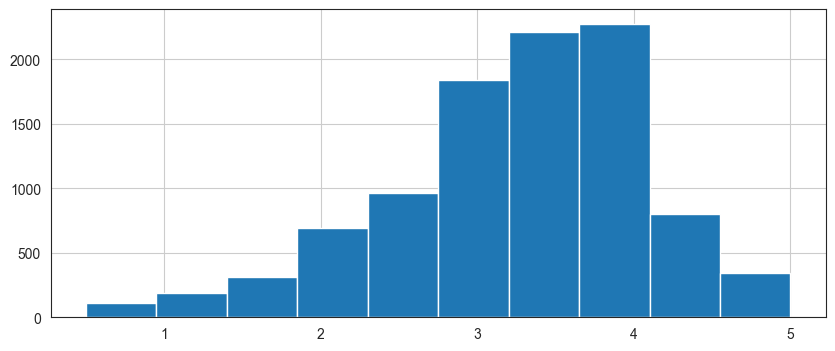

In [49]:
plt.figure(figsize = (10,4))
ratings['rating'].hist(bins= 10)

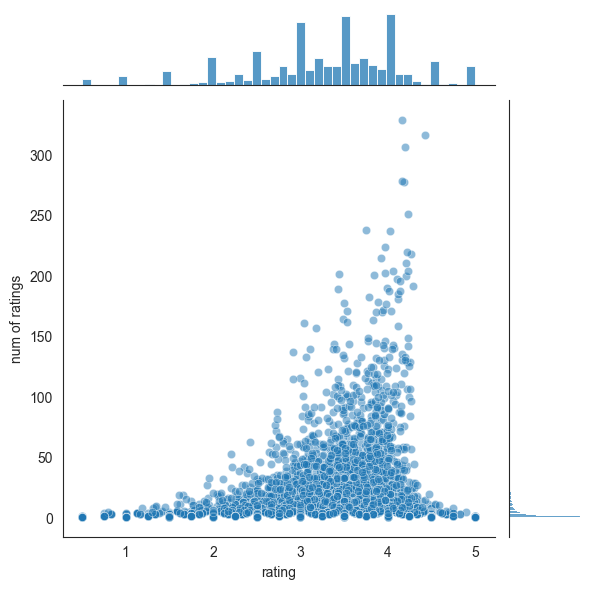

In [54]:
sns.jointplot(ratings, x='rating', y = 'num of ratings', alpha = 0.5);

### 4. Recommended System

In [56]:
# making pivot table 'user id' as index, 'title' as columns, and 'rating' as values
moviemat = df.pivot_table(index = 'userId', columns= 'title', values = 'rating')
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Example: choose movies (Forrest Gump and The Matrix)

In [69]:
# Lets grab those two movies
forestgump_user_rating = moviemat['Forrest Gump (1994)']

In [74]:
# use corrwith() to get corr between this two movies
similiar_to_forestgump = moviemat.corrwith(forestgump_user_rating)

c:\Users\rafly\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\rafly\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\rafly\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\rafly\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


#### The result may get ambiguous beacuse a lot of movie ratings just vote once/twice by a user that also watch forestgump

In [114]:
corr_forestgump = pd.DataFrame(similiar_to_forestgump, columns= ['correlation'])
corr_forestgump.dropna(inplace=True)
corr_forestgump = corr_forestgump.join(ratings['num of ratings'])
corr_forestgump.sort_values('correlation', ascending=False).head()

,correlation,num of ratings
title,,
Lost & Found (1999),1.0,2
"Century of the Self, The (2002)",1.0,2
The 5th Wave (2016),1.0,2
Play Time (a.k.a. Playtime) (1967),1.0,3
Memories (Memorîzu) (1995),1.0,3


In [116]:
# filtering out movies that have less than 100 reviews
corr_forestgump[corr_forestgump['num of ratings'] > 100].sort_values('correlation', ascending=False).head(10)

,correlation,num of ratings
title,,
Forrest Gump (1994),1.000000,329
Good Will Hunting (1997),0.484042,141
Aladdin (1992),0.464268,183
American History X (1998),0.457287,129
"Truman Show, The (1998)",0.432556,125
Braveheart (1995),0.416976,237
Ferris Bueller's Day Off (1986),0.405830,109
Mrs. Doubtfire (1993),0.401408,144
Full Metal Jacket (1987),0.397241,102


#### Make function for other movies

In [131]:
def recommended_movie(pivot, df_rating, title, min_rating=100):
    title_user_rating = pivot[title]
    similiar_to_title = pivot.corrwith(title_user_rating)
    df = pd.DataFrame(similiar_to_title, columns= ['correlation'])
    df.dropna(inplace=True)
    df = df.join(df_rating['num of ratings'])
    return df[df['num of ratings'] > min_rating].sort_values(by = 'correlation', ascending=False)

In [132]:
recommended_movie(moviemat, ratings, "Matrix, The (1999)")

c:\Users\rafly\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\rafly\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,correlation,num of ratings
title,,
"Matrix, The (1999)",1.000000,278
Die Hard (1988),0.544466,145
Inception (2010),0.514767,143
Braveheart (1995),0.496045,237
Aliens (1986),0.470865,126
...,...,...
Waterworld (1995),-0.023996,115
Fargo (1996),-0.079401,181
Star Trek: Generations (1994),-0.083503,108
